# Triangular lattice

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=73.0219kHz w=1000nm
lattice: lattice shape is square
lattice: Full lattice sizes: [2 1]
lattice: lattice constants: [1.45]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[24 20 20] is set.
DVR: R0=[3.725 3.    7.2  ]w is set.
Equalize: scale_factor is not a number. Set to None.
H_op: n=[24 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 2 states are to be calculated.
H_op: n=[24 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.39s.
H_solver: eigenstates memory usage:  0.17 MiB.
H_op: n=[24 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 2 states are to be calculated.
H_op: n=[24 20 20] dx=[0.15 0.1

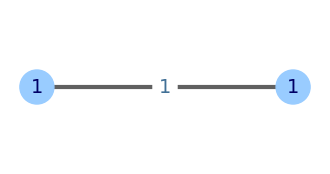

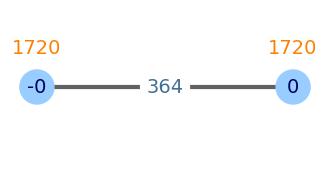

In [1]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
Lx = 2
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([Lx, Ly], dtype=int),
                 trap=(73.0219, 1000),
                 lc=1450,
                 laser=780,
                 dim=d,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 sparse=True,
                 symmetry=True,
                 lattice_symmetry=True,
                 verbosity=3)
eig_sol = eigen_basis(G)
E, W, p = eig_sol
E = E[0]
W = W[0]
p = p[0]
R = loc_mat(G, W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
R = [torch.from_numpy(Ri) for Ri in R]
solution = riemann_optimize(G, None, R)
V = site_order(G, W, solution, p)

G.A = V.conj().T @ (E[:, None] * V) * G.V0 / G.kHz_2p

# Shift onsite potential to zero average
G.A -= np.mean(np.real(np.diag(G.A))) * \
    np.eye(G.A.shape[0])
G.U = singleband_interaction(G, V, V, W, W, p, p)
G.draw_graph('adjust', A=G.A, U=G.U)
G.draw_graph(A=G.A, U=G.U)

print(f'V = {np.diag(G.A)}')
cv = np.sqrt(G.v_cost_func(G.A, None, None))
ct = np.sqrt(G.t_cost_func(G.A, None, None))
cu = np.sqrt(G.u_cost_func(G.U, None, None))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=73.2kHz w=1000nm
Triangular lattice size adjust to: [4 2]
lattice: lattice shape is triangular
lattice: Full lattice sizes: [4 2]
lattice: lattice constants: [1.45       1.25573684]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[36 24 20] is set.
DVR: R0=[5.5375     3.62786842 7.2       ]w is set.


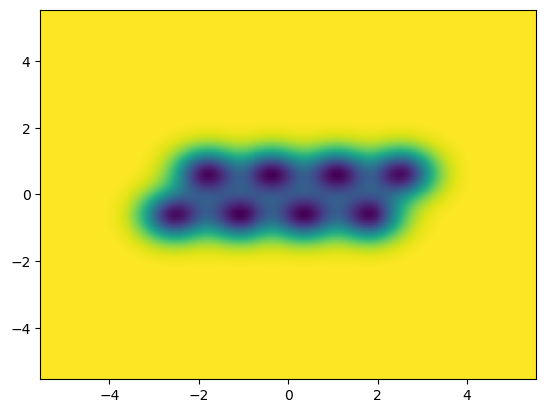

In [16]:
import matplotlib.pyplot as plt
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 20
R0 = np.array([3, 3, 7.2])
W = MLWF(N,
         R0=R0,
         lattice=np.array([4, 2], dtype=int),
         lc=1450,
         trap=(73.2, 1000),
         band=1,
         dim=3,
         shape='triangular',
         sparse=True,
         symmetry=True,
         lattice_symmetry=False)

x = np.linspace(-W.R0[0], W.R0[0], 500)
X = np.meshgrid(x, x)
V = W.Vfun(*X, 0)

plt.pcolormesh(*X, V)


Triangular lattice size adjust to: [4 2]
Equalize: scale_factor is not a number. Set to None.
detV = -1.0000000000000004
V = [ 1.11276632 -0.85192832 -0.89996212  0.63912414  0.63912415 -0.89996214
 -0.8519281   1.11276608]
V = [ 1.11276632 -0.85192832 -0.89996212  0.63912414  0.63912415 -0.89996214
 -0.8519281   1.11276608]
t = [0.20768665 0.2738433  0.32909686 0.12807234 0.80758288 0.32909689
 0.60086253 0.63438768 0.27384328 0.60086243 0.80758282 0.20768779
 0.12807279]
U = [0.15382414 1.17647268 1.14434116 1.05144495 1.05144496 1.14434114
 1.17647313 0.15382418]
V_err = 4.459849910153099
t_err = 0.5361216239421904
U_err = 0.47944068310930654


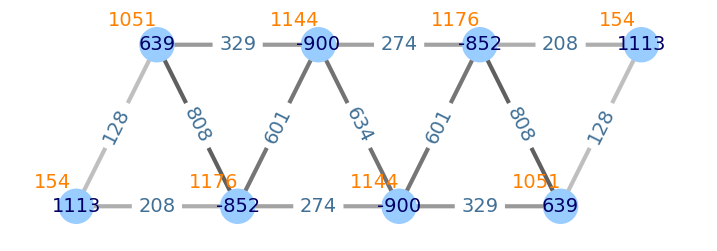

In [1]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 16
Lx = 4
Ly = 2
d = 3
shape = 'triangular'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([Lx, Ly], dtype=int),
                 trap=(73.0219, 1000),
                 lc=1450,
                 laser=780,
                 dim=d,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 sparse=True,
                 symmetry=True,
                 lattice_symmetry=False,
                 verbosity=0)
eig_sol = eigen_basis(G)
E, W, p = eig_sol
E = E[0]
W = W[0]
p = p[0]
R = Xmat(G, W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
R = [torch.from_numpy(Ri) for Ri in R]
solution = riemann_optimize(G, None, R)
V = site_order(G, solution, R)
print('detV =', la.det(V))
G.A = V.conj().T @ (E[:, None] * V) * G.V0 / G.kHz_2p

# Shift onsite potential to zero average
G.A -= np.mean(np.real(np.diag(G.A))) * \
    np.eye(G.A.shape[0])
G.U = singleband_interaction(G, V, V, W, W, p, p)
G.draw_graph(A=G.A, U=G.U)

print(f'V = {np.diag(G.A)}')
cv = np.sqrt(G.v_cost_func(G.A, None, None))
ct = np.sqrt(G.t_cost_func(G.A, None, None))
cu = np.sqrt(G.u_cost_func(G.U, None, None))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')


Inner product of eigenbasis shows that they are orthogonal:

In [2]:
Wmat = np.array(W).reshape(G.Nsite, -1).T
Wmat.T @ Wmat


array([[ 1.00000000e+00,  6.89468283e-16, -6.48309846e-17,
         2.83221301e-16, -7.40341076e-17,  6.48125620e-16,
        -3.31225369e-16, -1.26840053e-16],
       [ 6.89468283e-16,  1.00000000e+00,  8.64857505e-16,
         6.44119310e-17,  1.07312494e-15,  5.02716873e-16,
         7.95889639e-16,  2.34770953e-16],
       [-6.48309846e-17,  8.64857505e-16,  1.00000000e+00,
        -3.10116161e-16,  3.63011865e-16,  3.85363774e-16,
         3.44647385e-16, -1.29198110e-17],
       [ 2.83221301e-16,  6.44119310e-17, -3.10116161e-16,
         1.00000000e+00, -6.05899857e-16, -1.72469620e-16,
         3.64271825e-16,  1.09957751e-15],
       [-7.40341076e-17,  1.07312494e-15,  3.63011865e-16,
        -6.05899857e-16,  1.00000000e+00, -3.08871164e-16,
        -3.08950899e-16, -5.45957180e-16],
       [ 6.48125620e-16,  5.02716873e-16,  3.85363774e-16,
        -1.72469620e-16, -3.08871164e-16,  1.00000000e+00,
         1.94744626e-15,  1.14913161e-15],
       [-3.31225369e-16,  7.958896

Wannier function density plots:

Text(0.5, 1.0, '8 Wannier functions total probability density')

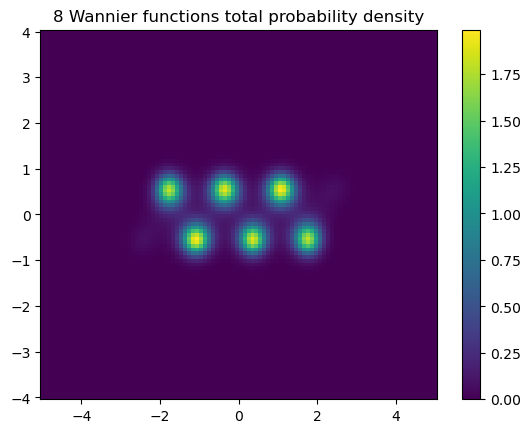

In [4]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 4, 100)
z = np.array([0])
wx = wannier_func(G, W, V, p, (x, y, z))


Wx = np.sum(np.reshape(wx, (*wx.shape[:2], G.Nsite))**2, axis=2)
X = np.meshgrid(x, y, indexing='ij')
plt.pcolormesh(*X, Wx)
plt.colorbar()
plt.title('8 Wannier functions total probability density')


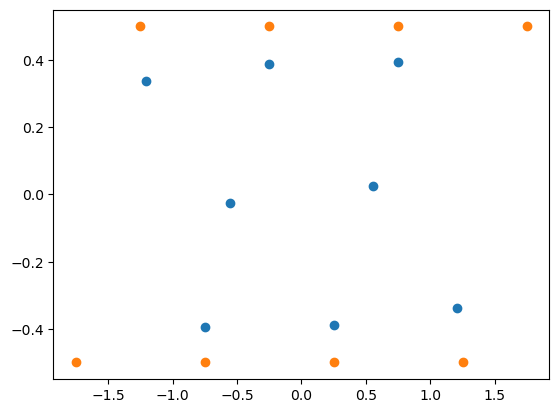

In [5]:
x = np.array([np.diag(V.T @ R[i].numpy() @ V) / G.lc[i]
              for i in range(G.lattice_dim)]).T

plt.plot(x[:, 0], x[:, 1], 'o')
plt.plot(G.trap_centers[:, 0], G.trap_centers[:, 1], 'o')


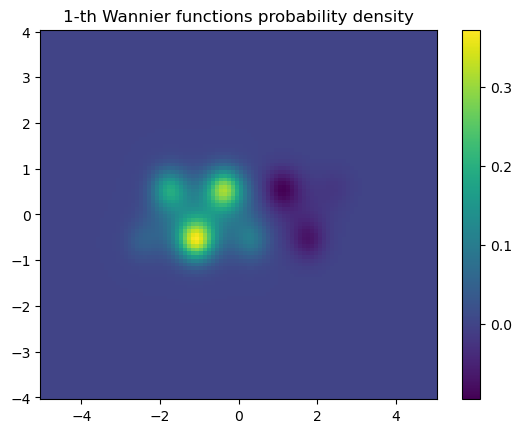

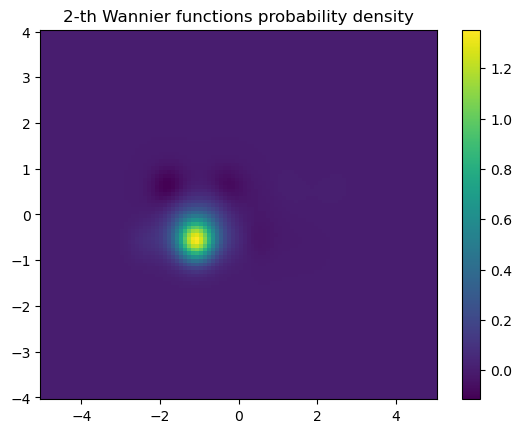

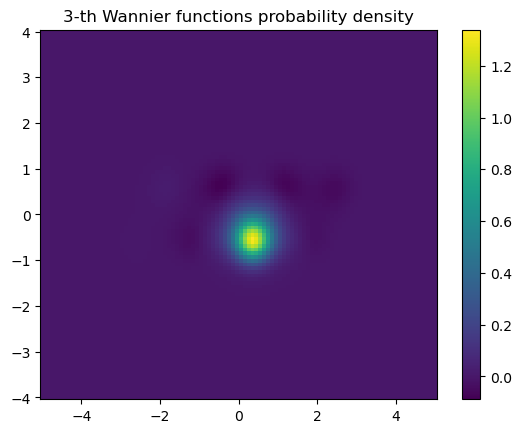

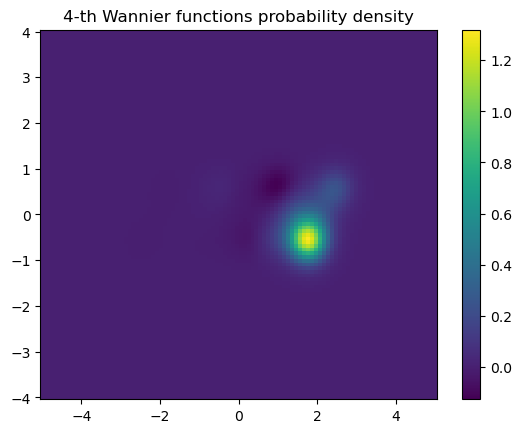

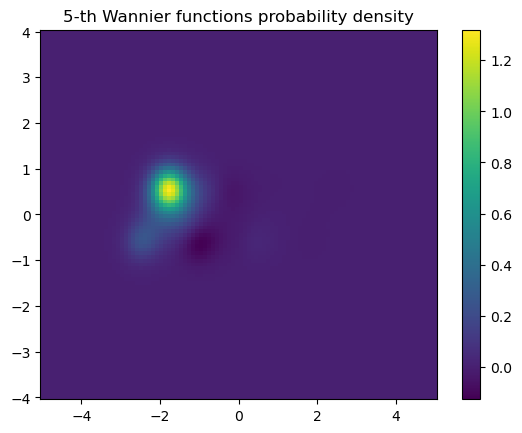

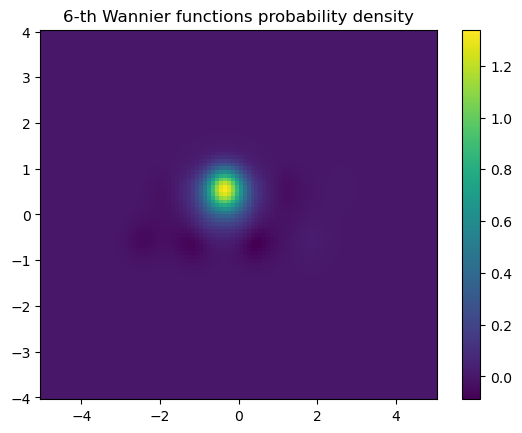

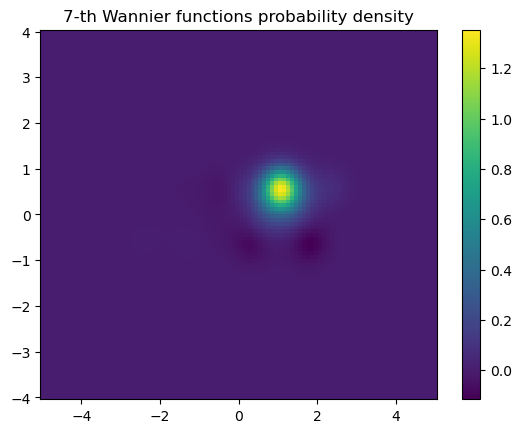

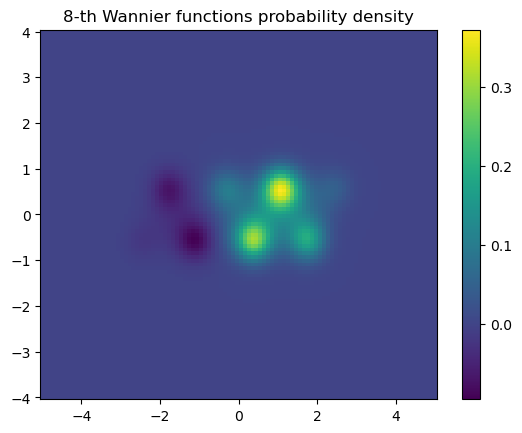

In [6]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 4, 100)
z = np.array([0])
wx = wannier_func(G, W, V, p, (x, y, z))
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(wx[..., 0, i], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


Wannier function inner products:

In [7]:
from scipy.integrate import simps, dblquad
x = np.linspace(-G.R0[0], G.R0[0], 500)
y = np.linspace(-G.R0[1], G.R0[1], 500)
z = np.linspace(-G.R0[2], G.R0[2], 500)


def intgrl3d(integrand: np.ndarray, x: list[np.ndarray, np.ndarray, np.ndarray]) -> float:
    for i in range(dim):
        if x[i].size > 1:
            integrand = simps(integrand, x[i], axis=0)
        else:
            integrand = integrand[0]
    return integrand


X = [x, y, z]
wf = wannier_func(G, W, V, p, X)
print(intgrl3d(wf[:, :, :, 0] * wf[:, :, :, 4], x=X))
print(intgrl3d(wf[:, :, :, 0] * wf[:, :, :, 1], x=X))
print(intgrl3d(wf[:, :, :, 3] * wf[:, :, :, 7], x=X))
print(intgrl3d(wf[:, :, :, 6] * wf[:, :, :, 7], x=X))


1.2160785868389173e-11
2.2466674545719604e-11
-1.2161183123382768e-11
-2.2464946438715224e-11


Wannier functions are orthogonal.

### Nice geometries

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=73.2kHz w=1000nm
Triangular lattice size adjust to: [4 2]
lattice: lattice shape is triangular
lattice: Full lattice sizes: [4 2]
lattice: lattice constants: [1.5        1.29903811]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[37 24 20] is set.
DVR: R0=[5.625      3.64951905 7.2       ]w is set.


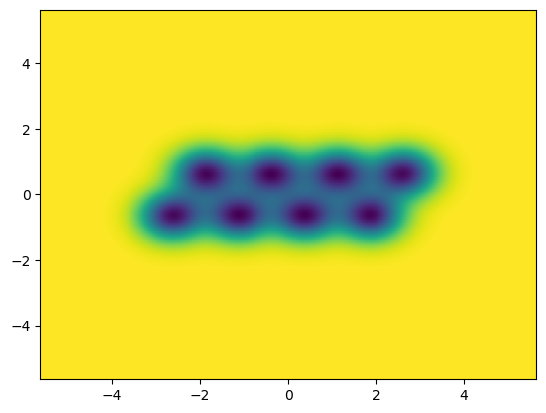

In [8]:
import matplotlib.pyplot as plt
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 20
R0 = np.array([3, 3, 7.2])
W = MLWF(N,
         R0=R0,
         lattice=np.array([4, 2], dtype=int),
         lc=1500,
         trap=(73.2, 1000),
         band=1,
         dim=3,
         shape='triangular',
         sparse=True,
         symmetry=True,
         lattice_symmetry=False)

x = np.linspace(-W.R0[0], W.R0[0], 500)
X = np.meshgrid(x, x)
V = W.Vfun(*X, 0)

plt.pcolormesh(*X, V)


DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[16 16 16] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=73.0219kHz w=1000nm
Triangular lattice size adjust to: [4 2]
lattice: lattice shape is triangular
lattice: Full lattice sizes: [4 2]
lattice: lattice constants: [1.55       1.34233938]w
lattice: dx fixed to: [0.1875 0.1875 0.45  ]w
DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[30 19 16] is set.
DVR: R0=[5.7125     3.67116969 7.2       ]w is set.
Equalize: scale_factor is not a number. Set to None.
H_op: n=[30 19 16] dx=[0.1875 0.1875 0.45  ]w p=[0 0 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_op: n=[30 19 16] dx=[0.1875 0.1875 0.45  ]w p=[0 0 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 2.54s.
H_solver: eigenstates memory usage:  2.47 MiB.
Optimizing...
Iteration    Cost                       G

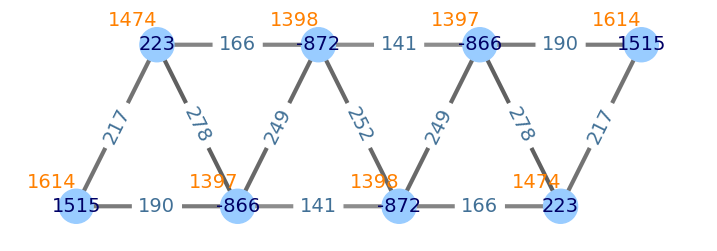

In [11]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 16
Lx = 4
Ly = 2
d = 3
shape = 'triangular'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([Lx, Ly], dtype=int),
                 trap=(73.0219, 1000),
                 lc=1550,
                 laser=780,
                 dim=d,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 sparse=True,
                 symmetry=True,
                 lattice_symmetry=False,
                 verbosity=3)
eig_sol = eigen_basis(G)
E, W, p = eig_sol
E = E[0]
W = W[0]
p = p[0]
R = Xmat(G, W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
R = [torch.from_numpy(Ri) for Ri in R]
solution = riemann_optimize(G, None, R)
V = site_order(G, solution, R)

G.A = V.conj().T @ (E[:, None] * V) * G.V0 / G.kHz_2p

# Shift onsite potential to zero average
G.A -= np.mean(np.real(np.diag(G.A))) * \
    np.eye(G.A.shape[0])
G.U = singleband_interaction(G, V, V, W, W, p, p)
G.draw_graph(A=G.A, U=G.U)

print(f'V = {np.diag(G.A)}')
cv = np.sqrt(G.v_cost_func(G.A, None, None))
ct = np.sqrt(G.t_cost_func(G.A, None, None))
cu = np.sqrt(G.u_cost_func(G.U, None, None))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')


Text(0.5, 1.0, '8 Wannier functions total probability density')

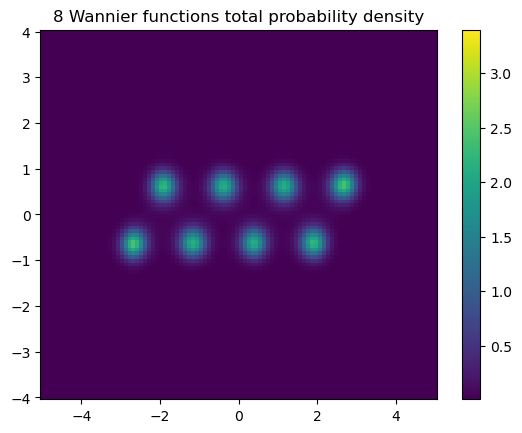

In [23]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 4, 100)
z = np.array([0])
wx = wannier_func(G, W, V, p, (x, y, z))


Wx = np.sum(np.reshape(wx, (*wx.shape[:2], G.Nsite))**2, axis=2)
X = np.meshgrid(x, y, indexing='ij')
plt.pcolormesh(*X, Wx, vmin=1e-2, vmax=3.4)
plt.colorbar()
plt.title('8 Wannier functions total probability density')


DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[16 16 16] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=73.0219kHz w=1000nm
Triangular lattice size adjust to: [3 3]
lattice: lattice shape is triangular
lattice: Full lattice sizes: [3 3]
lattice: lattice constants: [1.55       1.34233938]w
lattice: dx fixed to: [0.1875 0.1875 0.45  ]w
DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[24 23 16] is set.
DVR: R0=[4.55       4.34233938 7.2       ]w is set.
Equalize: scale_factor is not a number. Set to None.
H_op: n=[24 23 16] dx=[0.1875 0.1875 0.45  ]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 7 states are to be calculated.
H_op: n=[24 23 16] dx=[0.1875 0.1875 0.45  ]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.60s.
H_solver: eigenstates memory usage:  0.54 MiB.
H_op: n=[24 23 16] dx=[0.1875 0.1875 0.45  ]w p=[ 1 -1 

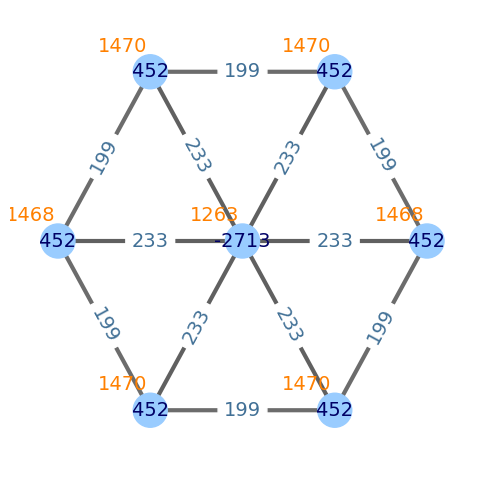

In [12]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 16
Lx = 3
Ly = 3
d = 3
shape = 'triangular'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([Lx, Ly], dtype=int),
                 trap=(73.0219, 1000),
                 lc=1550,
                 laser=780,
                 dim=d,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 sparse=True,
                 symmetry=True,
                 lattice_symmetry=True,
                 verbosity=3)
eig_sol = eigen_basis(G)
E, W, p = eig_sol
E = E[0]
W = W[0]
p = p[0]
R = Xmat(G, W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
R = [torch.from_numpy(Ri) for Ri in R]
solution = riemann_optimize(G, None, R)
V = site_order(G, solution, R)

G.A = V.conj().T @ (E[:, None] * V) * G.V0 / G.kHz_2p

# Shift onsite potential to zero average
G.A -= np.mean(np.real(np.diag(G.A))) * \
    np.eye(G.A.shape[0])
G.U = singleband_interaction(G, V, V, W, W, p, p)
G.draw_graph(A=G.A, U=G.U)

print(f'V = {np.diag(G.A)}')
cv = np.sqrt(G.v_cost_func(G.A, None, None))
ct = np.sqrt(G.t_cost_func(G.A, None, None))
cu = np.sqrt(G.u_cost_func(G.U, None, None))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')


Text(0.5, 1.0, '8 Wannier functions total probability density')

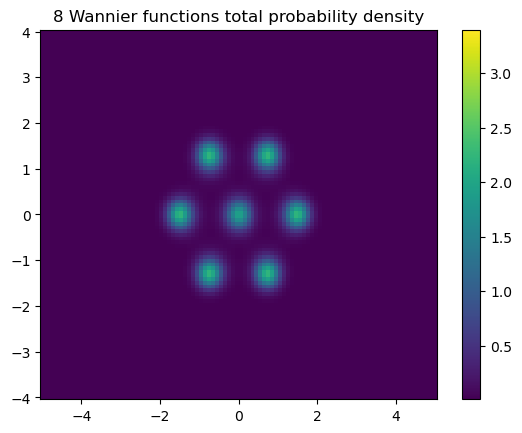

In [26]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 4, 100)
z = np.array([0])
wx = wannier_func(G, W, V, p, (x, y, z))


Wx = np.sum(np.reshape(wx, (*wx.shape[:2], G.Nsite))**2, axis=2)
X = np.meshgrid(x, y, indexing='ij')
plt.pcolormesh(*X, Wx, vmin=1e-2, vmax=3.4)
plt.colorbar()
plt.title('8 Wannier functions total probability density')


DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[16 16 16] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=73.0219kHz w=1000nm
Triangular lattice size adjust to: [6 2]
lattice: lattice shape is triangular
lattice: Full lattice sizes: [6 2]
lattice: lattice constants: [1.55       1.34233938]w
lattice: dx fixed to: [0.1875 0.1875 0.45  ]w
DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[38 19 16] is set.
DVR: R0=[7.2625     3.67116969 7.2       ]w is set.
Equalize: scale_factor is not a number. Set to None.
H_op: n=[38 19 16] dx=[0.1875 0.1875 0.45  ]w p=[0 0 1] Gaussian sparse diagonalization starts. Lowest 12 states are to be calculated.
H_op: n=[38 19 16] dx=[0.1875 0.1875 0.45  ]w p=[0 0 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 4.35s.
H_solver: eigenstates memory usage:  4.67 MiB.
Optimizing...
Iteration    Cost                       

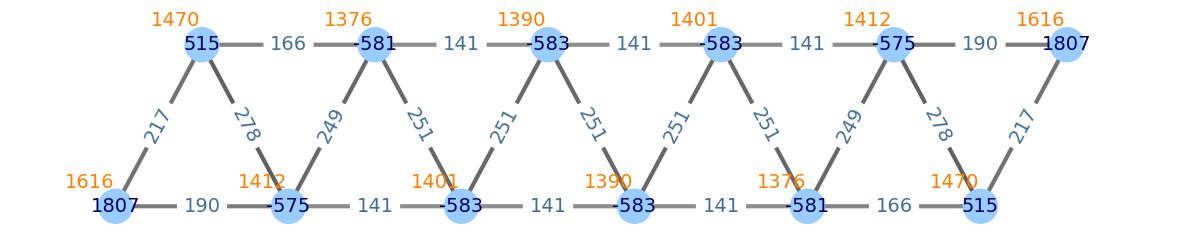

In [13]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 16
Lx = 6
Ly = 2
d = 3
shape = 'triangular'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([Lx, Ly], dtype=int),
                 trap=(73.0219, 1000),
                 lc=1550,
                 laser=780,
                 dim=d,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 sparse=True,
                 symmetry=True,
                 lattice_symmetry=False,
                 verbosity=3)
eig_sol = eigen_basis(G)
E, W, p = eig_sol
E = E[0]
W = W[0]
p = p[0]
R = Xmat(G, W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
R = [torch.from_numpy(Ri) for Ri in R]
solution = riemann_optimize(G, None, R)
V = site_order(G, solution, R)

G.A = V.conj().T @ (E[:, None] * V) * G.V0 / G.kHz_2p

# Shift onsite potential to zero average
G.A -= np.mean(np.real(np.diag(G.A))) * \
    np.eye(G.A.shape[0])
G.U = singleband_interaction(G, V, V, W, W, p, p)
G.draw_graph(A=G.A, U=G.U)

print(f'V = {np.diag(G.A)}')
cv = np.sqrt(G.v_cost_func(G.A, None, None))
ct = np.sqrt(G.t_cost_func(G.A, None, None))
cu = np.sqrt(G.u_cost_func(G.U, None, None))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
